## Libraries

In [103]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [105]:
#cleaned data :  no stopwords,punctuations

## Loading Dataset

In [107]:
df=pd.read_csv(r"E:\Imarticus\Projects\Resume_catego\clean_resume_data.csv")

In [108]:
df

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...
...,...,...,...
2479,99416532,AVIATION,rank sgt e non commissioned officer charge bri...
2480,24589765,AVIATION,government relations communications organizati...
2481,31605080,AVIATION,geek squad agent professional profile support ...
2482,21190805,AVIATION,program director office manager summary highly...


## Exploratory Data Analysis

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        2484 non-null   int64 
 1   Category  2484 non-null   object
 2   Feature   2483 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.3+ KB


In [113]:
df.shape

(2484, 3)

In [115]:
df.Category.value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

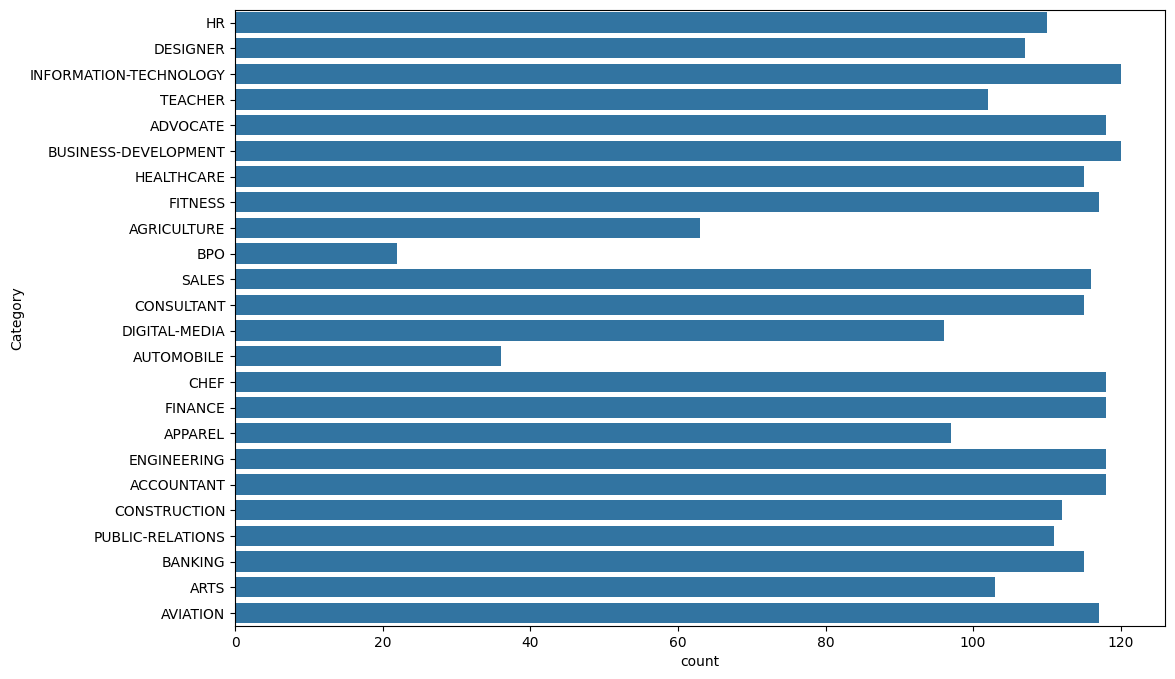

In [118]:
plt.figure(figsize=(12,8))
sns.countplot(df['Category'])
plt.show()

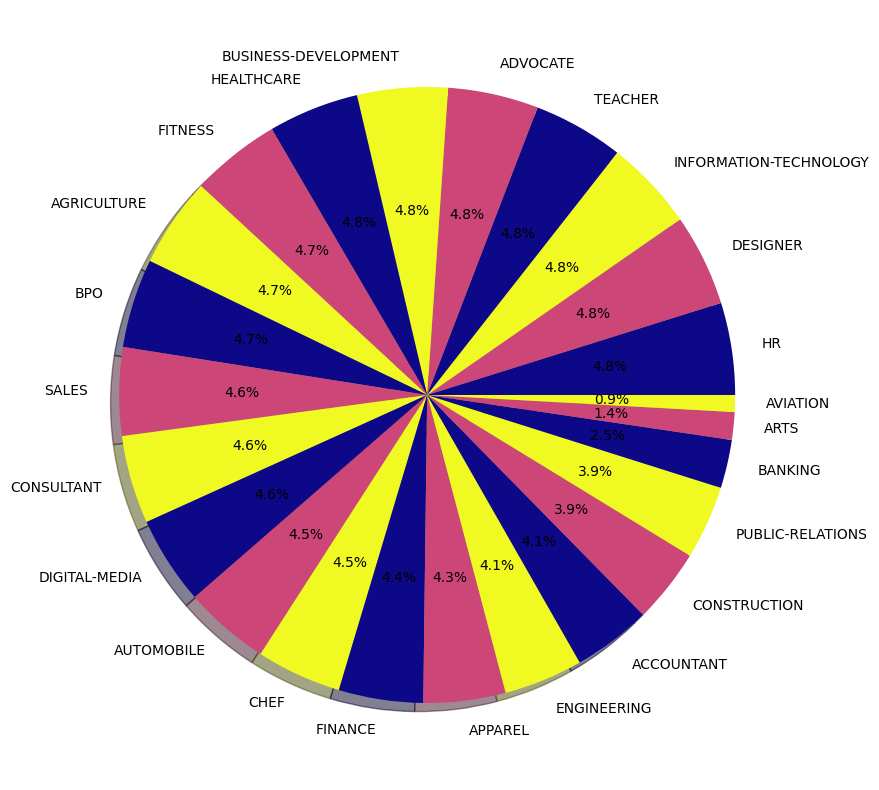

In [119]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(12,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%', shadow=True,colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

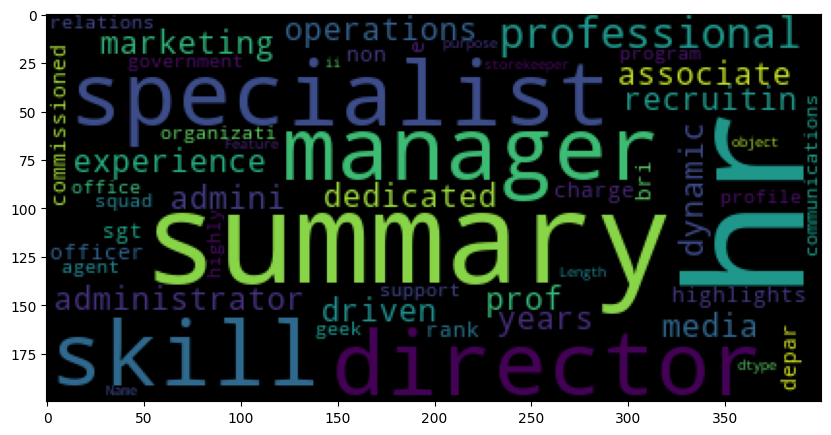

In [122]:

cloud=WordCloud(max_words=50).generate(str(df['Feature']))
plt.figure(figsize=(10,12))
plt.imshow(cloud)  

## Balancing Data

In [125]:
from sklearn.utils import resample

max_count=df['Category'].value_counts().max()

balance_data=[]
#Resampling to balanced value_counts of categories
for category in df['Category'].unique():
    category_data=df[df['Category']==category]
    if len(category_data)<max_count:
        #performing oversampling
        balanced_category_data=resample(category_data,replace=True,n_samples=max_count,random_state=32)
    else:
        #performing undersampling
        balanced_category_data=resample(category_data,replace=False,n_samples=max_count,random_state=32)
    balance_data.append(balanced_category_data)
    
balanced_df=pd.concat(balance_data)     

In [126]:
balanced_df['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
ARTS                      120
BANKING                   120
PUBLIC-RELATIONS          120
CONSTRUCTION              120
ACCOUNTANT                120
ENGINEERING               120
APPAREL                   120
FINANCE                   120
CHEF                      120
AUTOMOBILE                120
DIGITAL-MEDIA             120
CONSULTANT                120
SALES                     120
BPO                       120
AGRICULTURE               120
FITNESS                   120
HEALTHCARE                120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  120
TEACHER                   120
INFORMATION-TECHNOLOGY    120
AVIATION                  120
Name: count, dtype: int64

In [128]:
balanced_df.isnull().sum()

ID          0
Category    0
Feature     1
dtype: int64

In [132]:
balanced_df=balanced_df.dropna()

# Sampling

In [134]:
X=balanced_df['Feature']
Y=balanced_df['Category']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=34)




## Encoding (TF-IDF)

In [ ]:
tdf=TfidfVectorizer()
X_train_tdf=tdf.fit_transform(X_train)
X_test_tdf=tdf.transform(X_test)

## Building Model

In [144]:
rf=RandomForestClassifier()
rf.fit(X_train_tdf,Y_train)
pred=rf.predict(X_test_tdf)



Text(95.7222222222222, 0.5, 'Actual values')

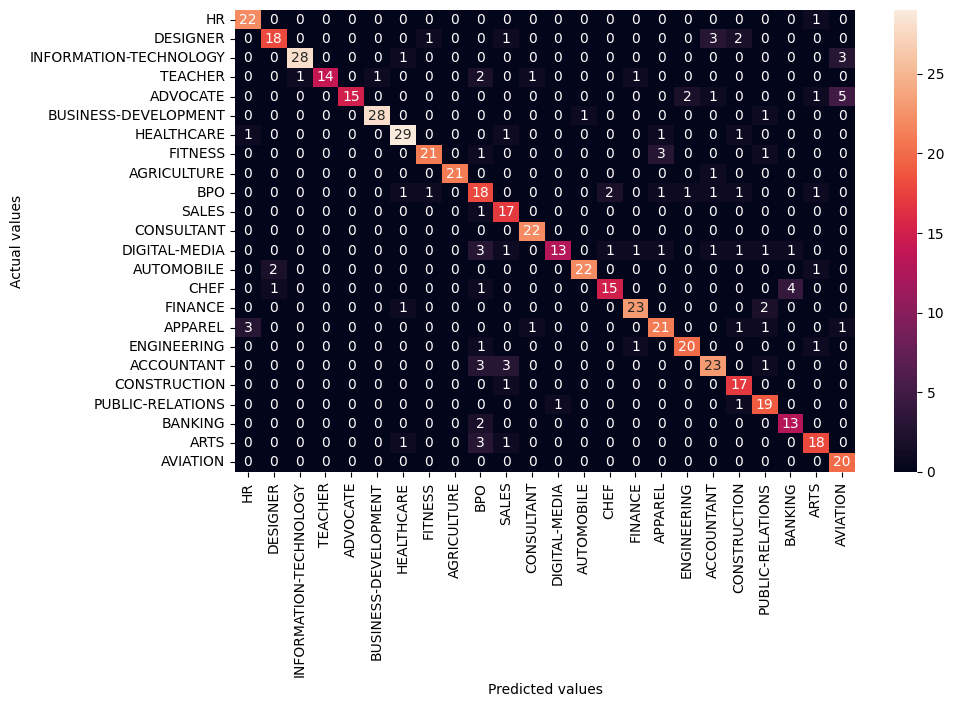

In [160]:
plt.figure(figsize=(10,6))
cf=confusion_matrix(Y_test,pred)
sns.heatmap(cf,annot=True,xticklabels=balanced_df['Category'].unique(), yticklabels=balanced_df['Category'].unique())
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

print(classification_report(Y_test,pred))

## Predictive System

In [ ]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText


# Prediction and Category Name
def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tdf.transform([resume_text])
    predicted_category = rf.predict(resume_tfidf)[0]
    return predicted_category

In [174]:
#Example Usage
resume_file="hr administrator marketing associate hr administrator summary dedicated customer service manager years experience hospitality customer service management respected builder leader customer focused teams strives instill shared enthusiastic commitment customer service highlights focused customer satisfaction team management marketing savvy conflict resolution techniques training development skilled multi tasker client relations specialist accomplishments missouri dot supervisor training certification certified ihg customer loyalty marketing segment hilton general manager training certification accomplished trainer cross server hospitality systems hilton onq micros opera pms fidelio opera reservation system ors holidex completed courses seminars customer service sales strategies inventory control loss prevention safety time management leadership performance assessment experience hr administrator marketing associate hr administrator dec current company name city state helps develop policies directs coordinates activities employment compensation labor relations benefits training employee services prepares employee separation notices related documentation keeps records benefits plans participation insurance pension plan personnel transactions hires promotions transfers performance reviews terminations employee statistics government reporting advises management appropriate resolution employee relations issues administers benefits programs life health dental insurance pension plans vacation sick leave leave absence employee assistance marketing associate designed created marketing collateral sales meetings trade shows company executives managed house advertising program consisting print media collateral pieces assisted complete design launch company website months created official company page facebook facilitate interaction customers analyzed ratings programming features competitors evaluate effectiveness marketing strategies advanced medical claims analyst mar dec company name city state reviewed medical bills accuracy treatments tests hospital stays prior sanctioning claims trained interpret codes icd cpt terminology commonly used medical billing fully understand paperwork submitted healthcare providers required organizational analytical skills well computer skills knowledge medical terminology procedures statistics billing standards data analysis laws regarding medical billing assistant general manager jun dec company name city state performed duties including limited budgeting financial management accounting human resources payroll purchasing established maintained close working relationships departments hotel ensure maximum operation productivity morale guest service handled daily operations reported directly corporate office hired trained staff overall objectives goals emphasis high customer service marketing advertising working public relations media government local businesses chamber commerce executive support marketing assistant jul jun company name city state provided assistance various department heads executive marketing customer service human resources managed front end operations ensure friendly efficient transactions ensured swift resolution customer issues preserve customer loyalty complying company policies exemplified second none customer service delivery interactions customers potential clients reservation front office manager jun jul company name city state owner partner dec may company name city state price integrity coordinator aug dec company name city state education n business administration jefferson college city state business administration marketing advertising high school diploma college prep studies sainte genevieve senior high city state awarded american shrubel leadership scholarship jefferson college skills accounting ads advertising analytical skills benefits billing budgeting clients customer service data analysis delivery documentation employee relations financial management government relations human resources insurance labor relations marketing marketing collateral medical billing medical terminology office organizational payroll performance reviews personnel policies posters presentations public relations purchasing reporting statistics website"

predict_category(resume_file)

'HR'

In [176]:
#Example Usage
resume_file='information technology manager network engineer professional overview highly skilled accomplished information technology manager years expertise planning implementing streamlining systems ensure maximum customer satisfaction business revenue strong leader demonstrated ability work effectively individuals levels functional areas exceptional communication project management skills ability successfully manage multiple priorities assignments skills platforms windows server professional windows xp pro home win dos citrix ica ms exchange hardware hp ibm dell intel based server desktop platforms cisco switches sonic wall hardware vpns hp laser jets toshiba e color copier toshiba sony laptops inter tel software ms office visio citrix metaframe xp symantec pc anywhere ghost antivirus utilities win fax mcafee virus scan adobe acrobat illustrator photoshop partition magic adware spyware networking tcp ip wireless b g dns wins dhcp relevant experience information technology manager network engineer feb current company name city state responsible day day operations functions wilkes six offices staff members currently lead team professionals developers planning upgrades implementation systems business applications development new software tools work closely cio senior management ensure business technology objectives aligned researched new technologies calculated future needs achieve accurate capacity planning negotiated hardware software purchases maintenance contracts dramatically reduced costs maintenance virtualizing company infrastructure using vmware reduced physical servers streamlined disaster recovery processes planned executed active directory domain migration r coordinated planning migration mpls network sites including upgrades routers switches network equipment increased speed reliability company email migrating microsoft exchange streamlined operations designing new citrix infrastructure using netscaler load balancers ensure better speed connectivity less downtime remote offices led planning implementation disaster recovery site atlanta created company first comprehensive business continuity plan tested success installed configuring barracuda spam virus firewalls resulting reduction spam enforced security policies managed monitored updated spam filtering virus malware prevention systems reduced desktop application deployment times designing implementing microsoft system center configuration manager conducted training internal systems local procedures technical subjects company employees coordinate external technology vendors internal staff members third party consultants network engineer sep jan company name city state administered managed windows server network environment responsible lan wan duties local remote networks acted technical consultant clients various projects provide end user support windows xp operating systems installed implemented exchange mail server implemented server desktop security using mcafee enterprise epolicy orchestrator installed configured web servers ftp servers pop mail servers manage cisco switches routers configured vpn remote access users implemented software domain policies patches upgrades using group policy sus trained new employees systems administration web development network support technician jan aug company name city provided network desktop support users provided technical support offices b domain supported help desk using help star software troubleshooting windows desktop computers implemented group policy objects control desktop environment security performed hardware software upgrades replacements performed installations troubleshooting ms office suite managed users computers organizational units active directory created disc images desktop notebook computers using norton ghost troubleshooting repairs laser printers copy machines education bachelor science management information systems university maryland university college city state certifications microsoft certified technology specialist mcts citrix certified administrator cca information systems management certificate project management certificate'

predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: INFORMATION-TECHNOLOGY


In [178]:
# Example Usage
resume_file = """Objective:
A creative and detail-oriented Designer with a passion for visual communication and brand identity seeking opportunities to leverage design skills in a dynamic and collaborative environment.

Education:
- Bachelor of Fine Arts in Graphic Design, XYZ College, GPA: 3.7/4.0
- Diploma in Web Design, ABC Institute, GPA: 3.9/4.0

Skills:
- Proficient in Adobe Creative Suite (Photoshop, Illustrator, InDesign)
- Strong understanding of typography, layout, and color theory
- Experience in both print and digital design
- Ability to conceptualize and execute design projects from concept to completion
- Excellent attention to detail and time management skills

Experience:
Graphic Designer | XYZ Design Studio
- Created visually appealing graphics for various marketing materials, including brochures, flyers, and social media posts
- Collaborated with clients to understand their design needs and deliver creative solutions that align with their brand identity
- Worked closely with the marketing team to ensure consistency in brand messaging across all platforms

Freelance Designer
- Designed logos, branding materials, and website layouts for small businesses and startups
- Managed multiple projects simultaneously while meeting tight deadlines and maintaining quality standards
- Established and maintained strong client relationships through clear communication and exceptional service

Projects:
- Rebranding Campaign for XYZ Company: Led a team to redesign the company's logo, website, and marketing collateral, resulting in a 30% increase in brand recognition
- Packaging Design for ABC Product Launch: Developed eye-catching packaging designs for a new product line, contributing to a successful launch and positive customer feedback

Certifications:
- Adobe Certified Expert (ACE) in Adobe Illustrator
- Responsive Web Design Certification from Udemy

Languages:
- English (Native)
- Spanish (Intermediate)
"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: DESIGNER


In [180]:
# Example Usage
resume_file = """Objective:
Dedicated and results-oriented Banking professional with a strong background in financial analysis and customer service seeking opportunities to contribute to a reputable financial institution. Eager to leverage expertise in risk management, investment strategies, and relationship building to drive business growth and client satisfaction.

Education:
- Bachelor of Business Administration in Finance, XYZ University, GPA: 3.8/4.0
- Certified Financial Analyst (CFA) Level I Candidate

Skills:
- Proficient in financial modeling and analysis using Excel, Bloomberg Terminal, and other financial software
- Extensive knowledge of banking products and services, including loans, mortgages, and investment products
- Strong understanding of regulatory compliance and risk management practices in the banking industry
- Excellent communication and interpersonal skills, with a focus on building rapport with clients and colleagues
- Ability to work efficiently under pressure and adapt to changing market conditions

Experience:
Financial Analyst | ABC Bank
- Conducted financial analysis and risk assessment for corporate clients, including credit analysis, financial statement analysis, and cash flow modeling
- Developed customized financial solutions to meet clients' needs and objectives, resulting in increased revenue and client retention
- Collaborated with cross-functional teams to identify new business opportunities and optimize existing processes

Customer Service Representative | DEF Bank
- Provided exceptional customer service to bank clients, addressing inquiries, resolving issues, and promoting banking products and services
- Processed transactions accurately and efficiently, including deposits, withdrawals, and account transfers
- Educated customers on various banking products and services, helping them make informed financial decisions

Internship | GHI Investments
- Assisted portfolio managers with investment research and analysis, including industry and company-specific research, financial modeling, and performance analysis
- Prepared investment presentations and reports for clients, highlighting investment opportunities and performance metrics
- Conducted market research and analysis to identify trends and opportunities in the financial markets

Certifications:
- Certified Financial Planner (CFP)
- Series 7 and Series 63 Securities Licenses

Languages:
- English (Native)
- Spanish (Proficient)

"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: BANKING


## Save Model

In [185]:
import pickle
pickle.dump(rf,open('models/rf_classifier_categorization.pkl','wb'))
pickle.dump(tdf,open('models/tfidf_vectorizer_categorization.pkl','wb'))